# Fire up

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Load some house sales data

In [184]:
data = pd.read_csv("home_data.csv")

In [169]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


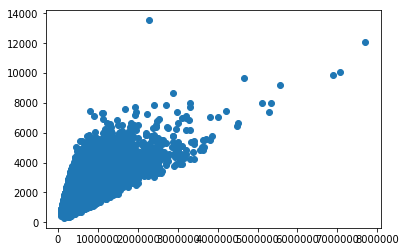

In [171]:
plt.scatter(data["price"], data["sqft_living"])
plt.show()

# Create a simple regression model of sqft_living to price

In [172]:
train_data, test_data = train_test_split(data, test_size=0.2)

train_data_X = train_data['sqft_living'].values[:,np.newaxis]
test_data_X = test_data['sqft_living'].values[:,np.newaxis]

train_data_y = train_data['price'].values
test_data_y = test_data['price'].values

# Build the regression model

In [183]:
sqft_model = linear_model.LinearRegression()
sqft_model.fit(train_data_X, train_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evaluate regression model

In [174]:

# Make predictions using the testing set
test_data_y_pred = sqft_model.predict(test_data_X)

In [175]:
print(test_data["price"].mean())

546001.6754568587


In [177]:
import math
print("Mean squared error: %.2f" % mean_squared_error(test_data_y, test_data_y_pred))
print('Variance score: %.2f' % r2_score(test_data_y, test_data_y_pred))
print("Root mean squared error:", math.sqrt(59112793836.07/len(test_data_y_pred)))

Mean squared error: 66836320571.08
Variance score: 0.48
Root mean squared error: 3697.840078153332


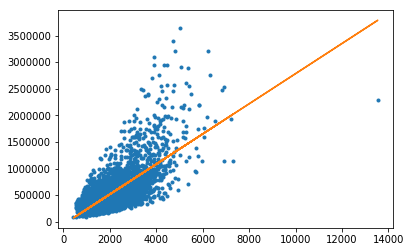

In [178]:
% matplotlib inline
plt.plot(test_data["sqft_living"], test_data["price"],".",
         test_data["sqft_living"], test_data_y_pred,"-")

In [179]:
print('Coefficients: \n', sqft_model.coef_)
print('Coefficients: \n', sqft_model.intercept_)

Coefficients: 
 [283.38675307]
Coefficients: 
 -50219.3244988072


# Explore other features in data

In [181]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
data[my_features].head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074


# Build regression model with more features

In [133]:
train_data_X_my_features = train_data[my_features].values[:,np.newaxis]
test_data_X_my_features = test_data[my_features].values[:,np.newaxis]

train_data_y_my_features = train_data['price'].values
test_data_y_my_features = test_data['price'].values

In [139]:
my_features_model = linear_model.LinearRegression()
my_features_model.fit(train_data[my_features], train_data['price'])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
# Make predictions using the testing set
test_data_y_pred_my_features = my_features_model.predict(test_data[my_features])

In [145]:
import math
print("Mean squared error: %.2f" % mean_squared_error(test_data_y_my_features, test_data_y_pred_my_features))
print('Variance score: %.2f' % r2_score(test_data_y_my_features, test_data_y_pred_my_features))
print("Root mean squared error:", math.sqrt(62630916285.82))

Mean squared error: 62630916285.82
Variance score: 0.53
Root mean squared error: 250261.6956024633


In [146]:
print('Coefficients: \n', my_features_model.coef_)
print('Coefficients: \n', my_features_model.intercept_)

Coefficients: 
 [-5.59379815e+04  1.27308655e+04  3.15322305e+02 -2.94014955e-01
 -5.29185116e+03  5.60254900e+02]
Coefficients: 
 -54891507.23890346


In [148]:
#plt.plot(test_data[my_features], test_data["price"],".",
#         test_data[my_features], test_data_y_pred_my_features,"-")

# Apply learned model to predict price of 3 houses

In [154]:
house1 = data[data["id"] == 5631500400]

In [156]:
print(house1["price"])

2    180000.0
Name: price, dtype: float64


In [161]:
print(sqft_model.predict(house1['sqft_living'].values[:,np.newaxis]))

[171106.56640571]


In [164]:
print(my_features_model.predict(house1[my_features]))

[164581.19200006]


# Prediction for a second, fancier house

In [221]:
len(data["zipcode"].unique())
gpby_data = data.groupby("zipcode").agg({"price": "mean"})
print(gpby_data[gpby_data['price'] == gpby_data['price'].max()])

zipcoe_data = data[data["zipcode"]==98039][["zipcode", "price"]]
zipcoe_data.count()
zipcoe_data["price"].mean()

             price
zipcode           
98039    2160606.6


2160606.6

In [232]:
gt = data["sqft_living"] > 2000
lt = data["sqft_living"] <= 4000
filter_data = data["sqft_living"][gt & lt]
print(data["sqft_living"].count())
print(filter_data.count())
fraction = filter_data.count()/data["sqft_living"].count()
print("fraction of the all houses have ‘sqft_living’ in this range : ", fraction)

21613
9118
fraction of the all houses have ‘sqft_living’ in this range :  0.42187572294452413


## Assignment of multi features model
### my_features model

In [239]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
train_data_my_feat, test_data_my_feat = train_test_split(data, test_size=0.2, random_state=0)

my_features_model = linear_model.LinearRegression()
my_features_model.fit(train_data_my_feat[my_features], train_data_my_feat['price'])

test_data_y_pred_my_features = my_features_model.predict(test_data_my_feat[my_features])

rmse_my_features = sqrt(mean_squared_error(test_data_my_feat['price'], test_data_y_pred_my_features))
rmse_my_features

244004.77443104231

### advanced_features model

In [241]:
ad_features = advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

train_data_ad_feat, test_data_ad_feat = train_test_split(data, test_size=0.2, random_state=0)

ad_features_model = linear_model.LinearRegression()
ad_features_model.fit(train_data_ad_feat[ad_features], train_data_ad_feat['price'])

test_data_y_pred_ad_features = ad_features_model.predict(test_data_ad_feat[ad_features])

rmse_ad_features = sqrt(mean_squared_error(test_data_ad_feat['price'], test_data_y_pred_ad_features))
rmse_ad_features

190473.37570967327

### RMSE diff between my_features model and advanced_features model

In [242]:
rmse_diff = rmse_my_features - rmse_ad_features
print("RMSE diff : ",rmse_diff)

RMSE diff :  53531.39872136904


In [244]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val1 = rmse(test_data_y_pred_my_features, test_data_my_feat['price'])
print("rms error is: " + str(rmse_val1))

rmse_val2 = rmse(test_data_y_pred_ad_features, test_data_ad_feat['price'])
print("rms error is: " + str(rmse_val2))

rms error is: 244004.77443104231
rms error is: 190473.37570967327


In [245]:
print(rmse_val1 - rmse_val2)

53531.39872136904
